# Project Title : Diamonds Price Prediction

# Description :


The "Diamonds Price Prediction" project leverages the power of machine learning to accurately forecast the prices of diamonds. With the diamond market being highly dynamic and influenced by various factors, this project aims to provide reliable predictions to assist buyers, sellers, and investors in making informed decisions.

The project involves several key steps. Firstly, the dataset is preprocessed to handle missing values, outliers, and categorical variables, ensuring the data is in a suitable format for training the machine learning model. Feature engineering techniques may also be employed to extract additional relevant information and enhance the predictive capabilities of the model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape  # dataset has 53940 rows and 10 columns

(53940, 10)

In [5]:
df.info()
# Display information about the DataFrame, including column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
#Checking for the null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [8]:
#Checking for unique values in cut column
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [10]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

# Create Bar Graph

Text(0, 0.5, 'price')

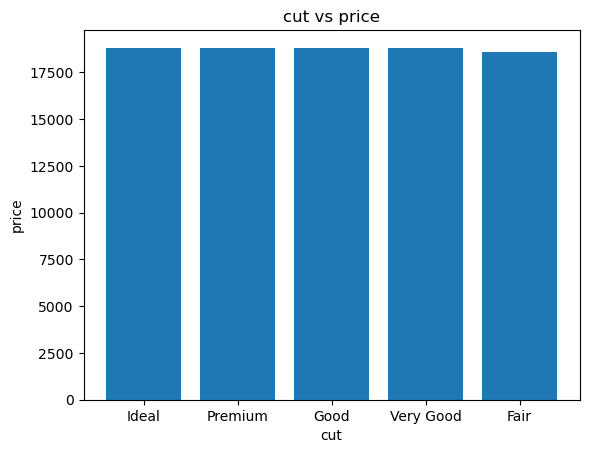

In [11]:
plt.bar(df['cut'],df['price'])
plt.title('cut vs price')
plt.xlabel('cut')
plt.ylabel('price')

# Create pie Graph

Text(0.5, 1.0, 'Cut vs Price')

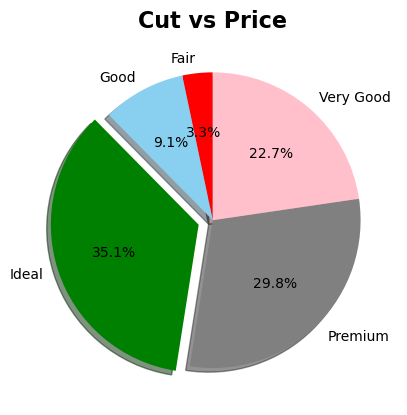

In [12]:
# Calculate the total price for each cuts
prices_by_cut = df.groupby('cut')['price'].sum()

#explode parameter, it allows you to separate a specific slice from the pie for emphasis
explode = [0,0,0.1,0,0]

#Set the colors for pie chart
colors = ['red', '#89cff0','green','grey','pink']#Baby Blue

# Create the pie chart
plt.pie(prices_by_cut,labels=prices_by_cut.index, autopct='%2.1f%%',colors=colors,explode=explode, shadow=True, startangle=90)
plt.title('Cut vs Price',fontsize=16, fontweight='bold')


Text(0, 0.5, 'Price')

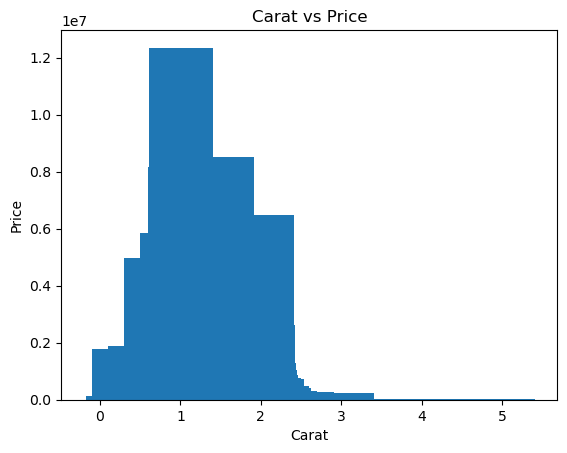

In [13]:
grouped_data = df.groupby('carat')['price'].sum().reset_index()

# Creating the bar graph
plt.bar(grouped_data['carat'], grouped_data['price'])
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

Text(0.5, 1.0, 'Clarity vs Prices')

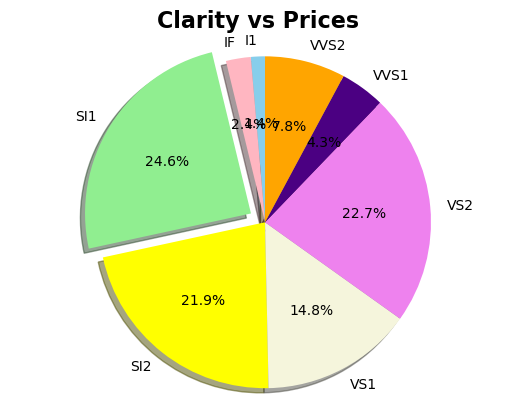

In [14]:
# Calculate the total charges for each clarity
prices_by_clarity = df.groupby('clarity')['price'].sum()

explode = [0, 0, 0.1, 0,0,0,0,0]

#Set the colors
colors = ['skyblue', 'lightpink', 'lightgreen', 'yellow','beige','violet','indigo','orange']

# Create the pie chart
plt.pie(prices_by_clarity, labels=prices_by_clarity.index, autopct='%2.1f%%',colors=colors,explode=explode, shadow=True, startangle=90)

# Set aspect ratio to be equal to make the pie circular
plt.axis('equal')

#title
plt.title('Clarity vs Prices', fontsize=16, fontweight='bold')

# scatter graph

Text(0, 0.5, 'Price')

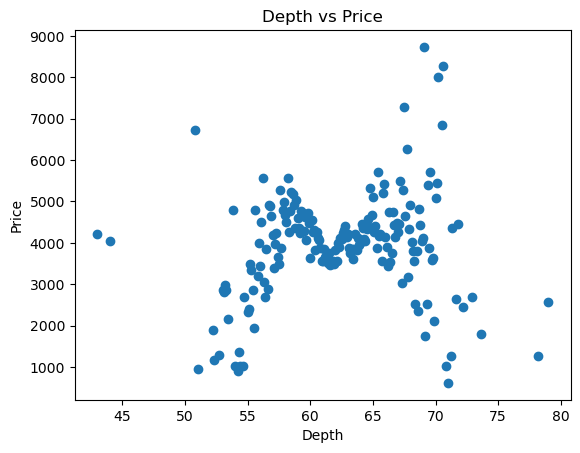

In [15]:
## Grouping the data by depth and calculating the mean of Prices
grouped_data = df.groupby('depth')['price'].mean().reset_index()

# Creating the scatter plot
plt.scatter(grouped_data['depth'], grouped_data['price'])
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

# Converting Categorical variable into numeric values

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
Le = LabelEncoder()
Ohe = OneHotEncoder(sparse=False, drop='first')

# LabelEncoder

In [18]:
df['color'] = Le.fit_transform(df['color'])

In [19]:
df['clarity']=Le.fit_transform(df['clarity'])

In [20]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,4,3,61.0,58.0,2757,6.15,6.12,3.74


# OneHotEncoder

In [21]:
encoded_features = Ohe.fit_transform(df[['cut']])

/Users/heppilkheni/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
new_columns = Ohe.get_feature_names_out(['cut'])
print(new_columns)

['cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good']


In [23]:
# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(encoded_features, columns=new_columns) 

In [24]:
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df,df_encoded],axis=1)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [26]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [27]:
#Checking the name of the total columns present in df
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

# Heatmap

/var/folders/qk/vj93rt353fxbdnbh89m9qkv80000gn/T/ipykernel_10751/3626070368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

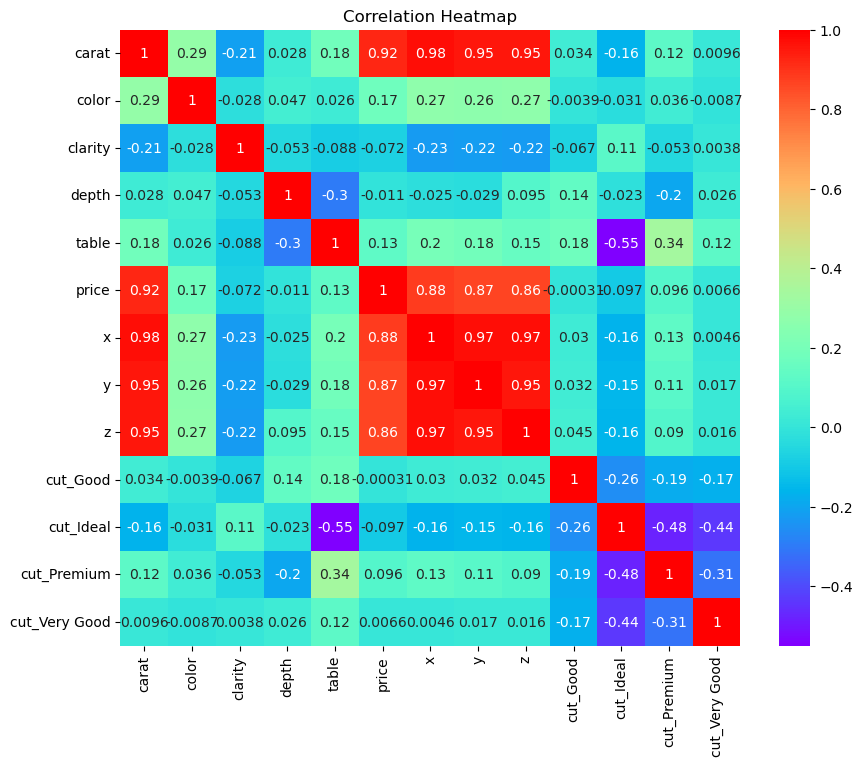

In [28]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

In [29]:
df.drop(columns='cut',axis=1,inplace=True)

# Creating the independent variable(X) and dependent variable(y)

In [30]:
# Extract features (X) and target variable (y)
x = df[['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']]
y = df[['price']]

In [31]:
# Convert X and y to numpy arrays
# x = np.array(x).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

In [32]:
df.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [33]:
x

,carat,color,clarity,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,61.5,55.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,1,2,59.8,61.0,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,5,5,62.4,58.0,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,6,3,63.3,58.0,4.34,4.35,2.75,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,2,60.8,57.0,5.75,5.76,3.50,0.0,1.0,0.0,0.0
53936,0.72,0,2,63.1,55.0,5.69,5.75,3.61,1.0,0.0,0.0,0.0
53937,0.70,0,2,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,1.0
53938,0.86,4,3,61.0,58.0,6.15,6.12,3.74,0.0,0.0,1.0,0.0


In [34]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


# Splitting the data set into train and test using train_test_split from sklearn.model_selection

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('carat',axis=1),df['carat'],test_size=0.2)
#Creating x_train,x_test,y_train and y_test we will set test_size = 0.2 so 20% of the actual data will be used as test data

In [37]:
df.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [38]:
print('x_train_shape: ',x_train.shape)
print('y_train_shape: ',y_train.shape)
print('x_test_shape: ',x_test.shape)
print('y_test_shape: ',y_test.shape)

x_train_shape:  (43152, 12)
y_train_shape:  (43152,)
x_test_shape:  (10788, 12)
y_test_shape:  (10788,)


In [39]:
y_train = y_train.values.reshape(-1, 1)
y_test= y_test.values.reshape(-1, 1)

# RobustScaler 
       #To handle the outliers

In [78]:
# from sklearn.preprocessing import RobustScaler

In [79]:
#Creating the object of Robust
# Rb = RobustScaler()

In [80]:
# x_train = Rb.fit_transform(x_train)

In [81]:
# x_test = Rb.transform(x_test)

In [82]:
# y_train = Rb.fit_transform(y_train)

In [83]:
# y_test = Rb.transform(y_test)

# Creating LinearRegression Model

In [84]:
x_mean = x_train.mean(axis=0)

In [85]:
y_mean = y_train.mean(axis=0)

In [86]:
num = 0
dim = 0
epsilon = 1e-8  
for i in range(len(x_train)):
    num += (x_train[i] - x_mean) * (y_train[i] - y_mean)
    dim += (x_train[i] - x_mean) ** 2

coff = num/(dim + epsilon)
inter = y_mean - (coff * x_mean)
print('Coff:', coff)
print('Intercept:', inter)

Coff: [ 0.38724587 -0.27281446  0.02337757  0.1784046   0.75148195  1.17821278
  1.12377747  1.16421019  0.09437853 -0.25017996  0.19482401  0.02190603]
Intercept: [ 0.20620163  0.13904766  0.15443398  0.12591022 -0.10872749  0.13299764
  0.13811028  0.14491347  0.14493463  0.25333819  0.10371181  0.1486646 ]


In [87]:
coff.shape

(12,)

In [88]:
x_train.shape

(43152, 12)

In [89]:
coff.shape

(12,)

In [90]:
m = coff
c = inter
y = m * 11 + c
z = m * 95644.50 + c
print('y:', y)
print('z:', z)

y: [ 4.46590615 -2.86191144  0.41158728  2.08836081  8.15757398 13.09333826
 12.4996625  12.95122553  1.18309851 -2.49864133  2.24677594  0.38963097]
z: [ 37038.14335774 -26093.06387013   2236.09072961  17063.54453767
  71875.0068038  112689.7055899  107483.27279648 111350.44616773
   9026.93264112 -23928.0834965   18633.94892572   2095.34036873]


In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [92]:
# Evaluate the model on the test set
y_pred = x_test.dot(coff)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):',mae)
print('Root Mean Squared Error (RMSE): ',rmse)

Mean Squared Error (MSE): 4.834026595452431
Mean Absolute Error (MAE): 1.8414562808722181
Root Mean Squared Error (RMSE):  2.198641988922351


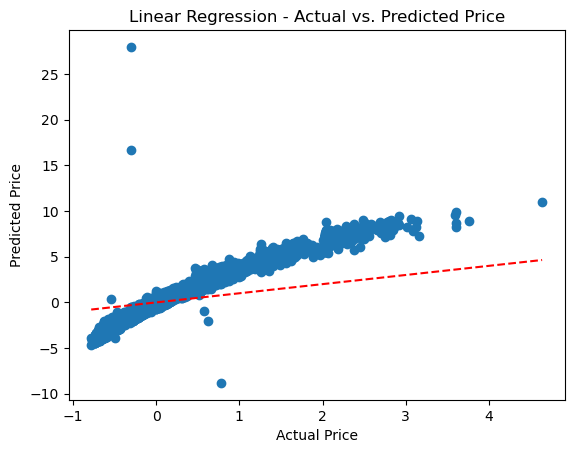

In [93]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression - Actual vs. Predicted Price')
plt.show()

# LinearRegression Through Function

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
Lr = LinearRegression()

In [58]:
Lr.fit(x_train,y_train)

LinearRegression()

In [59]:
Lr.coef_

array([[ 0.06787303, -0.04317483,  0.03386844,  0.01309946,  0.25547592,
         0.78009025,  0.02223238,  0.01011461, -0.04639674, -0.06395185,
        -0.05212849, -0.05254694]])

In [60]:
Lr.intercept_

array([0.11140769])

In [61]:
y_pred = Lr.predict(x_test)

In [62]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.013681716162658638
0.07481166284180076
0.1169688683482004


In [63]:
from sklearn.metrics import r2_score

In [64]:
r2 = r2_score(y_test, y_pred)
r2

0.9749016400758412

In [65]:
import missingno as msno 
# msno.matrix(df)

# Pipeline

In [66]:
from sklearn.compose import ColumnTransformer     #for Column Transformer  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LinearRegression    # for Linear Regression
from sklearn.preprocessing import MinMaxScaler

In [67]:
df.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [68]:
tr1=ColumnTransformer(transformers=[
    ('missing_carat',SimpleImputer(),[0]),
    ('missing_clarity',SimpleImputer(strategy="most_frequent"),[2]), #simpleImputer ka default mean hota hai
                                        #or idhar string hai so strategy='mean' or 'mediun' or 'most_frequent'
],remainder='passthrough')     #  passthrough -->> jiska columntransfer karna uski sivay ko dropout kar dega)

In [69]:
tr2=ColumnTransformer([
    ('One_carat_clarity',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,2])
],remainder="passthrough"
)

In [70]:
tr3=ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])
# yaha par iloc[:,0] se sab column pe MinMaxScaler laga dega
 

In [71]:
tr4=SelectKBest(score_func=chi2,k=8)

In [72]:
from sklearn.linear_model import LogisticRegression
tr5=LogisticRegression()

In [73]:
pipe=make_pipeline(tr1,tr2,tr3,tr4,tr5)

# Conclusion:

In conclusion, the "Diamonds Price Prediction" project utilizes machine learning to accurately forecast diamond prices. By analyzing a comprehensive dataset and employing advanced algorithms, the project empowers stakeholders with data-driven decision-making, enhancing transparency and efficiency in the diamond market. Real-time predictions enable informed transactions, benefiting buyers, sellers, and investors.